![avatar](images/softmax.png)

看一下分类问题，还是拿平面上的点分布来说，平面上有很多(x,y)点，绿色*分布在上面，蓝色x分布在下面，怎么样找到一条分割线，能把两种不同的点分割开来？
下面，我们还是用numpy生成这样的点

分类问题：
1. sigmod,softmax
2. 损失函数，最大似然，交叉熵
3. 分类问题的评估指标

[[ 1.00000000e+00  3.67561870e-01  3.78859061e+00]
 [ 0.00000000e+00  4.14661940e-01  5.66694829e+00]
 [ 0.00000000e+00  6.02763376e-01  1.09556861e+01]
 [ 1.00000000e+00  6.77816537e-01  5.64184116e+00]
 [ 0.00000000e+00  6.66766715e-01  7.78086404e+00]
 [ 1.00000000e+00  6.60173537e-01  2.77879568e+00]
 [ 0.00000000e+00  5.68433949e-01  9.30453034e+00]
 [ 1.00000000e+00  3.96505741e-01  7.03511992e-01]
 [ 1.00000000e+00  6.06393214e-01  4.91234263e+00]
 [ 0.00000000e+00  6.70637870e-01  7.26914616e+00]
 [ 1.00000000e+00  8.81103197e-01  7.34694556e+00]
 [ 1.00000000e+00  6.99479275e-01  2.88711838e+00]
 [ 1.00000000e+00  8.91923355e-01  2.73775483e+00]
 [ 1.00000000e+00  6.18015429e-01  5.26660636e+00]
 [ 1.00000000e+00  1.00226887e-01  2.36406130e+00]
 [ 1.00000000e+00  9.52749012e-01  7.41791008e+00]
 [ 0.00000000e+00  3.15428351e-01  8.72184190e+00]
 [ 1.00000000e+00  9.62188545e-01  4.73314490e+00]
 [ 1.00000000e+00  2.48753144e-01  3.62466580e+00]
 [ 0.00000000e+00  7.74233689e-

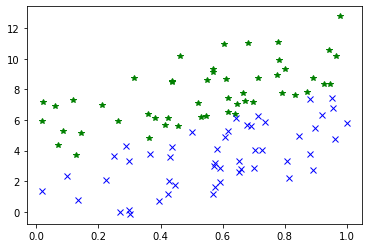

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(0)

data_count = 50
w,b = 5,3
x1 = np.random.rand(data_count)
y1 = w*x1 + b + np.random.rand(data_count)*5

x2 = np.random.rand(data_count)
y2 = w*x2 + b - np.random.rand(data_count)*5

# plt.plot(x1, y1, '*', color='green')
# plt.plot(x2, y2, 'x', color='blue')

def generate_data_old(w,b,data_count,labels=0):
    x = np.random.rand(data_count) 
    y = (w*x + b + np.random.rand(data_count)*5).reshape((-1, 1))  
    label = np.ones_like(y) if labels==1 else np.zeros_like(y) 
    return np.concatenate((label,np.reshape(x,(-1, 1)),y),axis=1)

def generate_data(x,y,data_count,labels=0):
    label = np.ones_like(y) if labels==1 else np.zeros_like(y) 
    return np.concatenate((label,np.reshape(x,(-1, 1)),y),axis=1)

#生成数据，第一列为label，值0,1, 第二列x0, 第三列x1
data_0 = generate_data(x1,y1.reshape((-1, 1)),data_count,0)
data_1 = generate_data(x2,y2.reshape((-1, 1)),data_count,1)
data_all = np.concatenate((data_0,data_1),axis=0)
np.random.shuffle(data_all)
print(data_all)

label = data_all[:,0:1]
x = data_all[:,1:3]
print(label)
print(x)

plt.plot(x1, y1, '*', color='green')
plt.plot(x2, y2, 'x', color='blue')


In [2]:
weight = np.random.randint(0,10,3) #.reshape((-1, 1)) 
print("weight", weight.shape,weight)

delta = 1e-7

learning_rate = 0.05

def linear(x):
    tmp_x = np.column_stack((x,np.ones(x.shape[0]))) 
    return np.dot(tmp_x,weight.T) # x*weight

def sigmoid(x):
    tmp = np.where(x < 0, np.exp(x)/(1 + np.exp(x)), 1/(1 + np.exp(-x))) #数值稳定性
#     print("tmp:",tmp)
    return 1/(1 + np.exp(-x))

def forward(x):
    return sigmoid(linear(x))

def loss(predict,real_labels):
    predict = predict.reshape((-1,1))
#     print("shape:",predict.shape,real_labels.shape)
    tmp1 = -np.mean(real_labels*np.log(predict+delta))
    tmp2 = -np.mean(real_labels*np.log(predict+delta) + (1-real_labels)*np.log(1 - predict + delta) )
#     tmp2 = -real_labels*np.log(predict+delta) + (1-real_labels)*np.log(1 - predict+delta) 
    print(tmp1,tmp2)
    return tmp2

def back(w,x,y): 
    """更新w,b参数"""
    predict_y = forward(x)
#     print("predict_y:",predict_y)
#     print("y:",y.reshape((1,-1)))
#     print("y_shape:",predict_y.shape,y.shape)
    gradient = (predict_y-y.reshape((1,-1)))
    tmp_x = np.column_stack((x,np.ones(x.shape[0]))) 
#     print("gradient:",gradient.shape,x.shape,gradient)
    tmp = np.mean(np.dot(gradient,tmp_x),axis=0)
#     print("tmpxx:",tmp)
    tmp_w = w - learning_rate * tmp 
    return tmp_w

# print(x)
# print(linear(x))
# print(f(x))
# # w0*x + w1* y + w2 = 0
# # y= -(w0*x+w2)/w1 = -(w0/w1)*x - (w2/w1)
# # w=-(w0/w1), b=-(w2/w1)
predict_y = forward(x)
print("predict_y:",predict_y.shape,predict_y)
print("label:",label.shape,label)
# error = loss(predict_y,label)
# print(error)



from sklearn.metrics import log_loss 
print("custom_loss:",loss(predict_y,label))
print("log_loss:",log_loss(label, predict_y))

# y_true = [[0, 1]] 
# y_pred_1 = [[0.3, 0.7]] 
# print("custom_loss:",loss(np.array(y_pred_1),np.array(y_true)))
# print("log_loss:",log_loss(y_true, y_pred_1))

# print(error,-weight[0]/weight[1],-weight[2]/weight[1])

# print(back(w,x,label))

weight (3,) [0 8 2]
predict_y: (100,) [1.         1.         1.         1.         1.         1.
 1.         0.99951365 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.71904732 1.         1.         1.
 1.         1.         1.         1.         0.99975884 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.99999989 1.         1.         1.         1.         1.
 1.         0.99998914 1.         1.         0.99999763 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99998641 1.
 1.         1.         0.99999973 1.         1.         1.
 1.         1.         1.         0.99999997 1.         0.88847687
 1.         1.         1.         1.         1.         0.96239127
 1.         0.99999999 0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1

weight (3,) [7 8 4] -0.875 -0.5
9.6182111115968e-05 8.059144007523663
error: 8.059144007523663 17.269884228291197 0.499583666363181 0.1325526266681707
7.159146315479762 7.159146265479765
error: 7.159146265479765 13.251907552139977 2.960084010402772 1.615208765483043
1.0076465294066985 1.007977212388124
error: 1.007977212388124 1.0079825187155427 -1.9076813330151978 -1.2535581124132171
1.8403363933020333e-05 8.059027929995061
error: 8.059027929995061 16.702997936287897 0.4346565545791175 0.17901428403995784
7.299700895473851 7.299700845473854
error: 7.299700845473854 14.323976004146449 1.2853526892364813 0.813318754907814
5.048050693972932 5.048050644306294
error: 5.048050644306294 6.572568847084899 -3.789575709464095 -2.9245518909609065
2.023699693873547e-06 8.056069903690583
error: 8.056069903690583 14.973786918877574 0.4744829428274723 0.27942938194056977
7.262870142441921 7.262870092441924
error: 7.262870092441924 14.370975649329058 1.1878604363855347 0.8904926605716147
5.4318095878

0.4737275065875377 0.47636597081594984
error: 0.47636597081594984 0.47653516808684077 4.720260064255245 4.288198778097451
1.8562070520147944e-06 0.8552456034532498
error: 0.8552456034532498 0.8552806555413924 2.721811760041283 2.4423766396192934
2.4829264951989707 2.482926458004126
error: 2.482926458004126 3.340287554344671 4.557293621580388 4.1382567802556
1.4338781876287702e-05 0.5375775381437405
error: 0.5375775381437405 0.5375870747674255 2.944910774637525 2.6477116827175777
1.8904548235348728 1.8904555068953701
error: 1.8904555068953701 2.2194376525066546 4.765134215795241 4.3256891542259535
1.0050170108810337e-06 0.9531981613725616
error: 0.9531981613725616 0.9532513113414438 2.6950611601825165 2.4154197566582645
2.558595096474692 2.558595052880178
error: 2.558595052880178 3.5161127874486744 4.497691867656634 4.080149748787622
3.120329968148774e-05 0.4380878654085021
error: 0.4380878654085021 0.4380938828118889 3.093292489773149 2.7814814317066965
1.4849068309572786 1.48491423242

error: 0.8354608201032288 0.8534507537671913 4.771729378841013 4.004285310782727
1.9115503650536594e-06 0.6221853423341284
error: 0.6221853423341284 0.6222089483621844 3.260325586732754 2.711692876901619
1.5888895134100065 1.5888903599414133
error: 1.5888903599414133 1.8480089953758891 4.574433615708198 3.8351663518288737
4.6391229821161596e-05 0.2912139347069369
error: 0.2912139347069369 0.2912171745062594 3.7132693363849074 3.0953660118189568
0.49435588893099386 0.49536243443997174
error: 0.49536243443997174 0.4959134812234177 4.619743076060559 3.8664632847689857
2.3181817368545477e-05 0.3433844854126499
error: 0.3433844854126499 0.34338928371053534 3.6146875089876906 3.0059300588075275
0.7128344455476423 0.7130691805419035
error: 0.7130691805419035 0.7199536981842312 4.756851885344484 3.976447709185669
2.6905367052652238e-06 0.5716743417396997
error: 0.5716743417396997 0.5716925512105068 3.3134277085379407 2.7462748593786155
1.470552714010791 1.4705545065891448
error: 1.470554506589

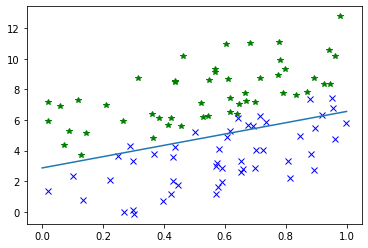

In [3]:
weight = np.random.randint(0,10,3)
print("weight", weight.shape,weight,-weight[0]/weight[1],-weight[2]/weight[1])
learning_rate = 0.05

for i in range(500):
    predict_y = forward(x)
    error = loss(predict_y,label)
    err2 = log_loss(label, predict_y)
    weight = back(weight,x,label) 
#     if i % 500 == 0:
    print("error:",error,err2,-weight[0]/(weight[1]+delta),-weight[2]/(weight[1]+delta))
# print("error:",weight,error)
pw = -weight[0]/(weight[1]+delta)
pb = -weight[2]/(weight[1]+delta)
print("weight:",pw,pb,error)

plt.plot(x1, y1, '*', color='green')
plt.plot(x2, y2, 'x', color='blue')
plt.plot([0,1],[pb,pw+pb])

使用pytorch实现

torch.Size([100, 2])
tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],

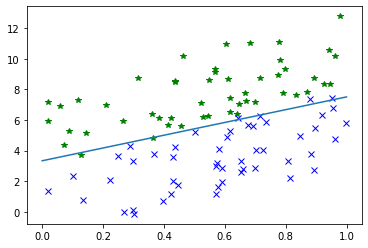

In [4]:
import torch
import torch.nn as nn

# 创建一个Logistic回归的模型
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim,bias=True)  

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

model = LogisticRegressionModel(2, 1) #模型初始化
criterion = nn.BCELoss() #定义损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #定义最优化算法

inX = torch.as_tensor(x,dtype=torch.float32) #将numpy转成tensor
outY = torch.as_tensor(label,dtype=torch.float32).reshape(-1,1)
print(inX.shape)
print(outY)

for epoch in range(5000):  #迭代次数
    optimizer.zero_grad() #清理模型里参数的梯度值
    predict_Y = model(inX) #根据输入获得当前参数下的输出值
    loss = criterion(predict_Y, outY) #计算误差
    loss.backward() #反向传播，计算梯度，
    optimizer.step() #更新模型参数
    if epoch % 50 ==0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

print('epoch {}, loss {}'.format(epoch, loss.item()))

predict_Y = model(inX)
# print(predict_Y)

# for name,p in model.named_parameters():
#     print(name,p)

# print(model.state_dict())

pw = -model.state_dict()["linear.weight"][0][0].item()/(model.state_dict()["linear.weight"][0][1].item()+delta)
pb = -model.state_dict()["linear.bias"][0].item()/(model.state_dict()["linear.weight"][0][1].item()+delta)
print("weight:",pw,pb)

plt.plot(x1, y1, '*', color='green')
plt.plot(x2, y2, 'x', color='blue')
plt.plot([0,1],[pb,pw+pb])

sigmoid 和 softmax 的联系和区别？

* Sigmoid=>多标签分类问题=>多个正确答案=非独占输出

* Softmax=>多类别分类问题=>只有一个正确答案=>互斥输出（所有概率总和为1）

In [5]:
def softmax(x,axis=-1):
    exp_x = np.exp(x-np.max(x,axis=axis, keepdims=True))
    sum_exp_x = np.sum(exp_x,axis=axis, keepdims=True)
    y = exp_x / sum_exp_x
    return y 

inpu_1 = np.array([[1,2,3,4],[5,2,3,0]])
print("softmax n=4:", softmax(inpu_1))

inpu_2 = np.array([[1,2],[5,2]])
print("softmax n=2:", softmax(inpu_2))
print("torch sigmoid:",torch.sigmoid(torch.tensor(inpu_2)))
print("sigmoid:", sigmoid(inpu_2))



softmax n=4: [[0.0320586  0.08714432 0.23688282 0.64391426]
 [0.83902451 0.04177257 0.11354962 0.0056533 ]]
softmax n=2: [[0.26894142 0.73105858]
 [0.95257413 0.04742587]]
torch sigmoid: tensor([[0.7311, 0.8808],
        [0.9933, 0.8808]])
sigmoid: [[0.73105858 0.88079708]
 [0.99330715 0.88079708]]
